In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
import joypy
from joypy import joyplot

In [3]:
# For the EDA, we will use the dataset containing the tracks from all the genres
df = pd.read_csv('../../data/raw_data/all_genres_playlists.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9198 entries, 0 to 9197
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_id           9198 non-null   object 
 1   playlist_url       9198 non-null   object 
 2   playlist_name      9198 non-null   object 
 3   track_name         9198 non-null   object 
 4   track_popularity   9198 non-null   int64  
 5   artist_name        9198 non-null   object 
 6   album              9198 non-null   object 
 7   album_cover        9198 non-null   object 
 8   artist_genres      9198 non-null   object 
 9   artist_popularity  9198 non-null   int64  
 10  danceability       9198 non-null   float64
 11  energy             9198 non-null   float64
 12  key                9198 non-null   int64  
 13  loudness           9198 non-null   float64
 14  mode               9198 non-null   int64  
 15  speechiness        9198 non-null   float64
 16  acousticness       9198 

In [5]:
df.head()

track_id                                       playlist_url  \
0  4Gia17DzXBhYFbYiJj6SyW  https://open.spotify.com/playlist/7qACZGMjyo64...   
1  1BjYNhg7JhVfQdxqEThBwn  https://open.spotify.com/playlist/7qACZGMjyo64...   
2  2Cg3GUkhjX96nO4p2WRlIa  https://open.spotify.com/playlist/7qACZGMjyo64...   
3  5bC6ONDsL88snGN6QasjZH  https://open.spotify.com/playlist/7qACZGMjyo64...   
4  2TKykeHeVKsBqZC8M3SKcN  https://open.spotify.com/playlist/7qACZGMjyo64...   

        playlist_name               track_name  track_popularity  \
0  The Sound of Blues              Working Man                51   
1  The Sound of Blues            Long Way Home                38   
2  The Sound of Blues        She's A Sweet One                49   
3  The Sound of Blues                  Help Me                59   
4  The Sound of Blues  Take Out Some Insurance                51   

                  artist_name  \
0                   Otis Rush   
1  Clarence "Gatemouth" Brown   
2                Junior Wells   
3     Sonny Boy Williamson II   
4                  Jimmy Reed   

                                               album  \
0                            Mourning In The Morning   
1                                      Long Way Home   
2  Calling All Blues - The Chief, Profile & USA R...   
3                               More Real Folk Blues   
4                                  Rockin' With Reed   

                                         album_cover  \
0  https://i.scdn.co/image/ab67616d0000b273fea221...   
1  https://i.scdn.co/image/ab67616d0000b2730e1f13...   
2  https://i.scdn.co/image/ab67616d0000b27399b18c...   
3  https://i.scdn.co/image/ab67616d0000b273b48c81...   
4  https://i.scdn.co/image/ab67616d0000b2739b7573...   

                                       artist_genres  artist_popularity  ...  \
0  ['blues', 'blues rock', 'chicago blues', 'elec...                 41  ...   
1  ['blues', 'blues rock', 'memphis blues', 'mode...                 33  ...   
2  ['blues', 'blues rock', 'chicago blues', 'elec...                 41  ...   
3  ['acoustic blues', 'blues', 'blues rock', 'chi...                 46  ...   
4  ['blues', 'blues rock', 'chicago blues', 'elec...                 42  ...   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0436         0.492          0.000418     0.204    0.841   
1     0       0.0380         0.910          0.048000     0.120    0.425   
2     1       0.0542         0.150          0.026500     0.202    0.713   
3     0       0.0430         0.597          0.021300     0.610    0.771   
4     1       0.0513         0.663          0.000000     0.122    0.566   

     tempo  duration_ms  time_signature  genre  
0  103.355       147800               4  blues  
1   78.033       338333               4  blues  
2  122.863       181786               4  blues  
3  114.216       188200               4  blues  
4  111.330       143332               4  blues  

[5 rows x 24 columns]

In [6]:
df.describe()

track_popularity  artist_popularity  danceability       energy  \
count       9198.000000        9198.000000   9198.000000  9198.000000   
mean          48.891716          51.161883      0.595363     0.535862   
std           17.501544          16.080915      0.192927     0.273231   
min            0.000000           0.000000      0.000000     0.000885   
25%           38.000000          42.000000      0.474000     0.334000   
50%           49.000000          52.000000      0.621000     0.578500   
75%           61.000000          62.000000      0.744000     0.757000   
max           95.000000         100.000000      0.984000     0.999000   

               key     loudness         mode  speechiness  acousticness  \
count  9198.000000  9198.000000  9198.000000  9198.000000   9198.000000   
mean      5.359209   -10.706267     0.596434     0.084681      0.362225   
std       3.558963     6.573201     0.490639     0.081614      0.368888   
min       0.000000   -47.001000     0.000000     0.000000      0.000002   
25%       2.000000   -13.255750     0.000000     0.038200      0.030425   
50%       6.000000    -8.761500     1.000000     0.049000      0.191000   
75%       8.000000    -6.128250     1.000000     0.087500      0.731000   
max      11.000000     1.342000     1.000000     0.827000      0.996000   

       instrumentalness     liveness      valence        tempo   duration_ms  \
count       9198.000000  9198.000000  9198.000000  9198.000000  9.198000e+03   
mean           0.227429     0.170279     0.502993   116.589396  2.532825e+05   
std            0.350817     0.139707     0.265940    29.270118  1.019732e+05   
min            0.000000     0.014500     0.000000     0.000000  3.033300e+04   
25%            0.000002     0.090100     0.282000    93.983000  1.897008e+05   
50%            0.001675     0.116000     0.519000   117.922500  2.282670e+05   
75%            0.461000     0.198000     0.724000   132.697250  2.864568e+05   
max            0.983000     0.979000     0.986000   216.090000  1.430840e+06   

       time_signature  
count     9198.000000  
mean         3.896934  
std          0.402003  
min          0.000000  
25%          4.000000  
50%          4.000000  
75%          4.000000  
max          5.000000

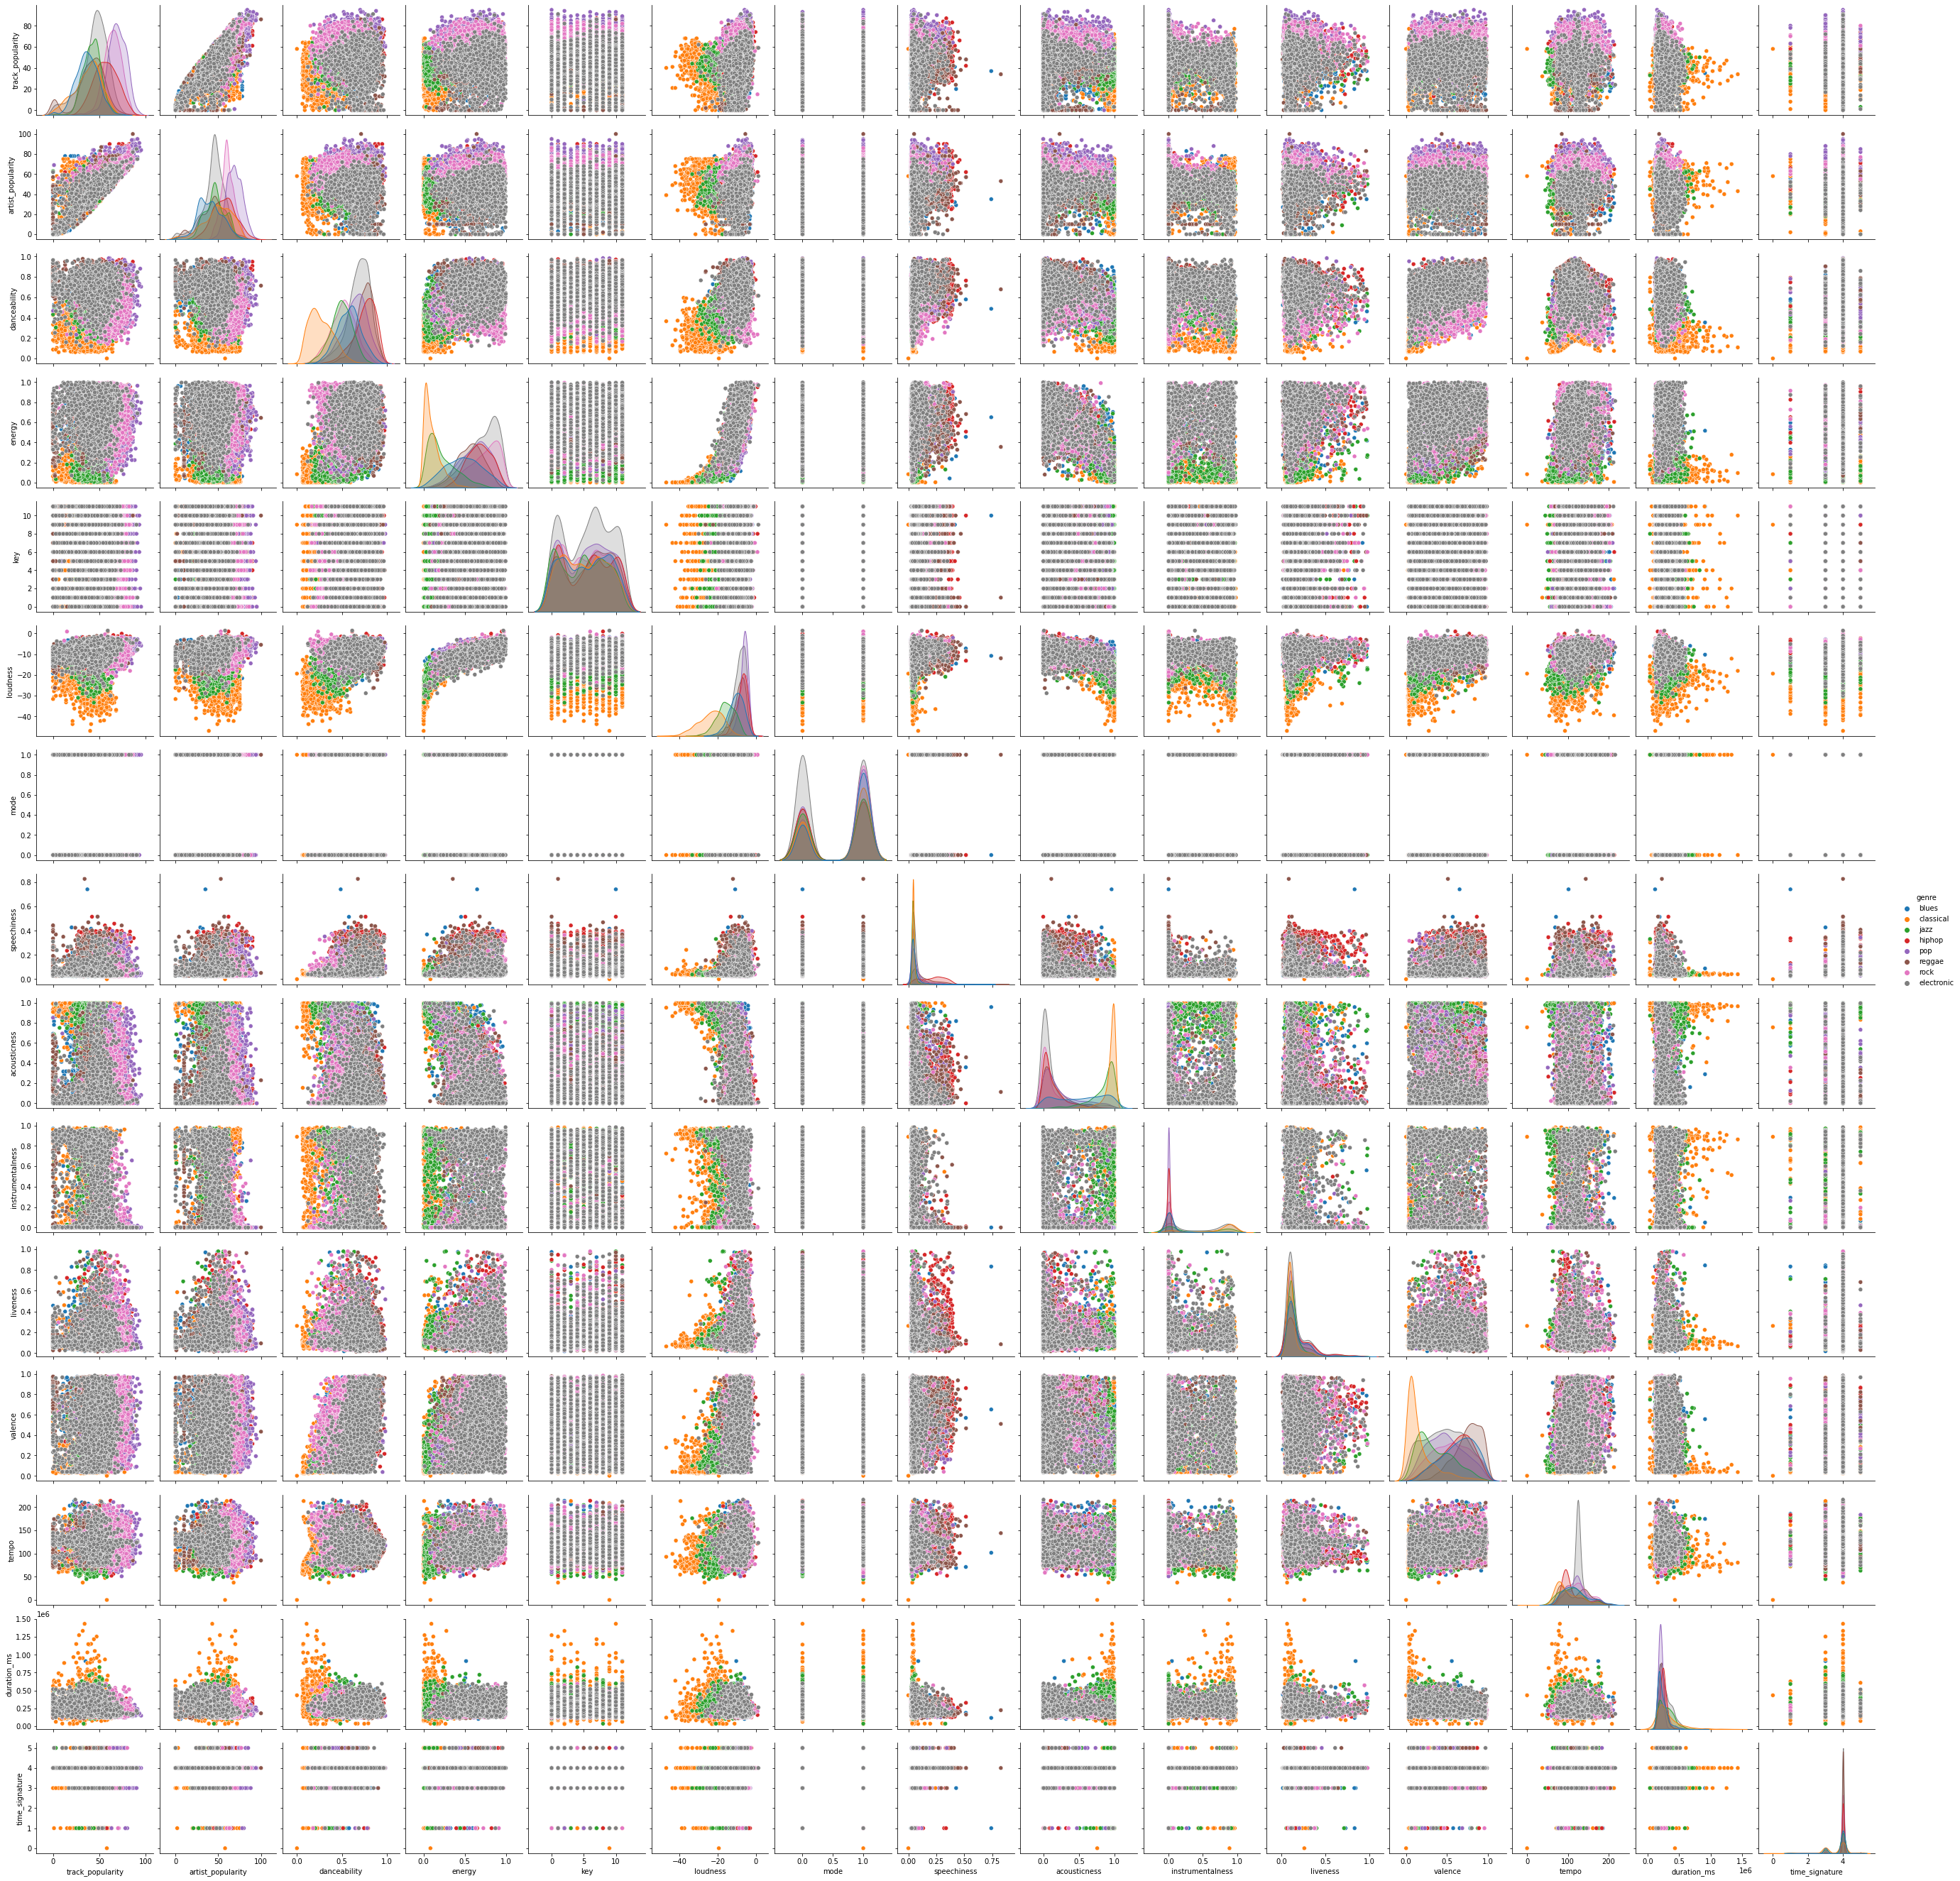

In [7]:
# As a first step we will observe the correlation between all our numeric variables, using multiple visualisations
# Pairplot
sns.pairplot(df, hue ='genre')
plt.show()

In [8]:
# Correlation
df.corr()

track_popularity  artist_popularity  danceability  \
track_popularity           1.000000           0.780360      0.129464   
artist_popularity          0.780360           1.000000     -0.023597   
danceability               0.129464          -0.023597      1.000000   
energy                     0.288374           0.150885      0.446537   
key                       -0.001346          -0.014154      0.054688   
loudness                   0.338667           0.207455      0.526012   
mode                       0.005053           0.023909     -0.071797   
speechiness                0.081441           0.062161      0.326789   
acousticness              -0.288502          -0.137491     -0.520671   
instrumentalness          -0.347610          -0.292171     -0.293485   
liveness                   0.046867           0.044749     -0.002578   
valence                    0.068615          -0.032480      0.562949   
tempo                      0.074658           0.040972      0.025793   
duration_ms               -0.179794          -0.138589     -0.214575   
time_signature             0.086286           0.019216      0.281254   

                     energy       key  loudness      mode  speechiness  \
track_popularity   0.288374 -0.001346  0.338667  0.005053     0.081441   
artist_popularity  0.150885 -0.014154  0.207455  0.023909     0.062161   
danceability       0.446537  0.054688  0.526012 -0.071797     0.326789   
energy             1.000000  0.052806  0.821630 -0.057206     0.212374   
key                0.052806  1.000000  0.039395 -0.178064     0.031254   
loudness           0.821630  0.039395  1.000000 -0.046461     0.213801   
mode              -0.057206 -0.178064 -0.046461  1.000000    -0.053364   
speechiness        0.212374  0.031254  0.213801 -0.053364     1.000000   
acousticness      -0.800144 -0.053203 -0.697377  0.071490    -0.246619   
instrumentalness  -0.331614 -0.013519 -0.514742 -0.013950    -0.252104   
liveness           0.189097  0.022547  0.149368  0.005144     0.104202   
valence            0.477256  0.040596  0.461079 -0.018178     0.221992   
tempo              0.259990  0.014933  0.225746 -0.003881     0.021832   
duration_ms       -0.162222 -0.024222 -0.225418 -0.010812    -0.118815   
time_signature     0.261488  0.005208  0.254059 -0.022922     0.111987   

                   acousticness  instrumentalness  liveness   valence  \
track_popularity      -0.288502         -0.347610  0.046867  0.068615   
artist_popularity     -0.137491         -0.292171  0.044749 -0.032480   
danceability          -0.520671         -0.293485 -0.002578  0.562949   
energy                -0.800144         -0.331614  0.189097  0.477256   
key                   -0.053203         -0.013519  0.022547  0.040596   
loudness              -0.697377         -0.514742  0.149368  0.461079   
mode                   0.071490         -0.013950  0.005144 -0.018178   
speechiness           -0.246619         -0.252104  0.104202  0.221992   
acousticness           1.000000          0.333630 -0.110793 -0.409042   
instrumentalness       0.333630          1.000000 -0.113253 -0.376149   
liveness              -0.110793         -0.113253  1.000000  0.073238   
valence               -0.409042         -0.376149  0.073238  1.000000   
tempo                 -0.221064         -0.087438  0.030316  0.141470   
duration_ms            0.120145          0.312184 -0.030739 -0.263456   
time_signature        -0.250657         -0.121161  0.025801  0.204169   

                      tempo  duration_ms  time_signature  
track_popularity   0.074658    -0.179794        0.086286  
artist_popularity  0.040972    -0.138589        0.019216  
danceability       0.025793    -0.214575        0.281254  
energy             0.259990    -0.162222        0.261488  
key                0.014933    -0.024222        0.005208  
loudness           0.225746    -0.225418        0.254059  
mode              -0.003881    -0.010812       -0.022922  
speechiness        0.021832    -0.118815

<AxesSubplot:>

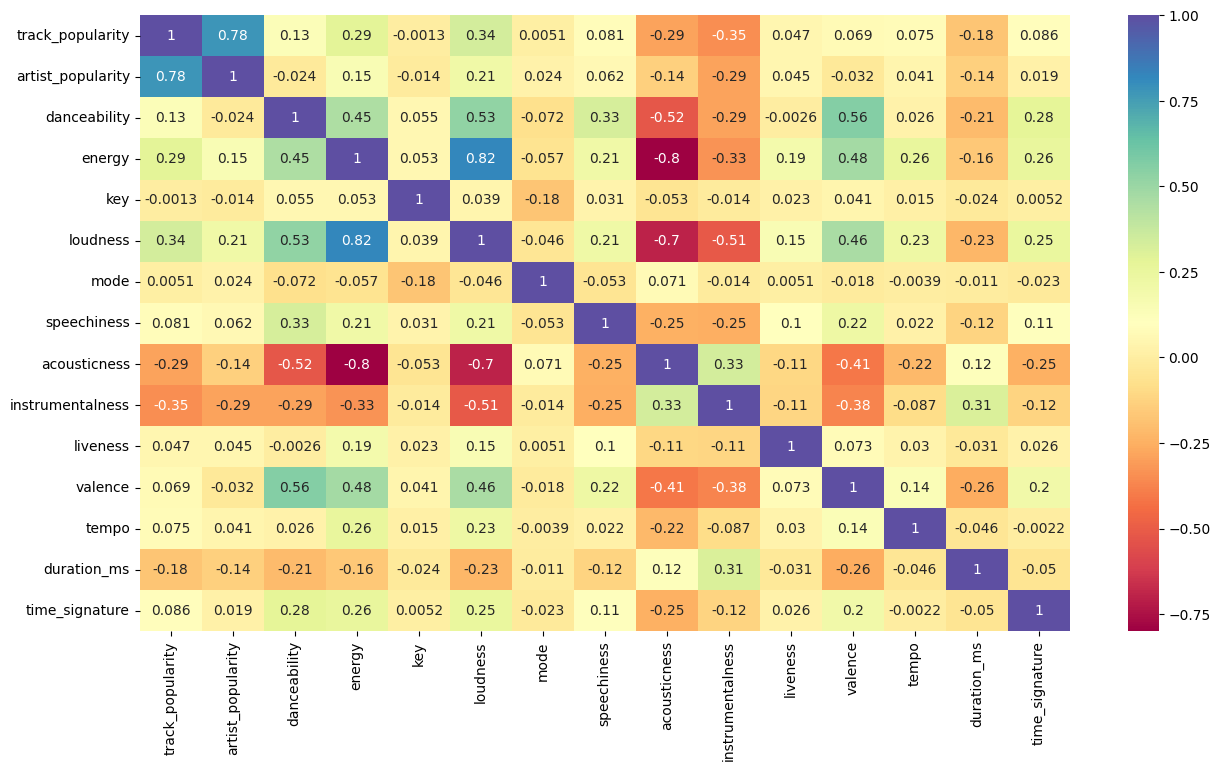

In [9]:
# Heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap="Spectral")

<AxesSubplot:>

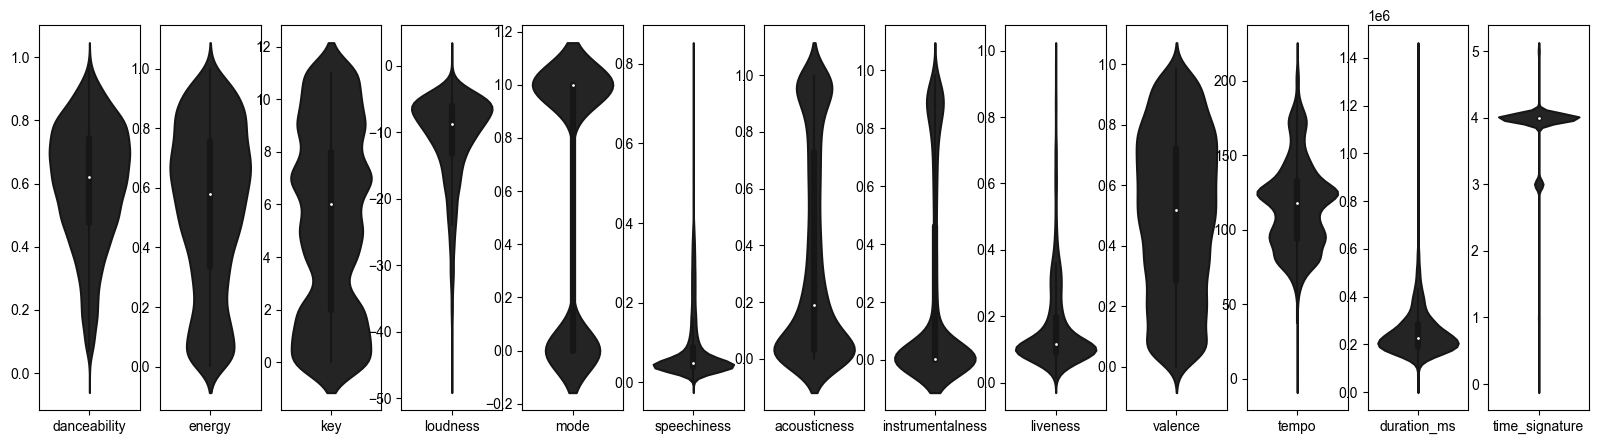

In [10]:
fig, axs = plt.subplots(ncols=13, figsize=(20,5))
# sns.set_theme(style="whitegrid", {'axes.grid' : False})
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_palette("gist_gray")
sns.violinplot(data=df[['danceability']], ax=axs[0], yticklabels=False)
sns.violinplot(data=df[['energy']], ax=axs[1])
sns.violinplot(data=df[['key']], ax=axs[2])
sns.violinplot(data=df[['loudness']], ax=axs[3])
sns.violinplot(data=df[['mode']], ax=axs[4])
sns.violinplot(data=df[['speechiness']], ax=axs[5])
sns.violinplot(data=df[['acousticness']], ax=axs[6])
sns.violinplot(data=df[['instrumentalness']], ax=axs[7])
sns.violinplot(data=df[['liveness']], ax=axs[8])
sns.violinplot(data=df[['valence']], ax=axs[9])
sns.violinplot(data=df[['tempo']], ax=axs[10])
sns.violinplot(data=df[['duration_ms']], ax=axs[11])
sns.violinplot(data=df[['time_signature']], ax=axs[12])

<AxesSubplot:xlabel='artist_popularity', ylabel='track_popularity'>

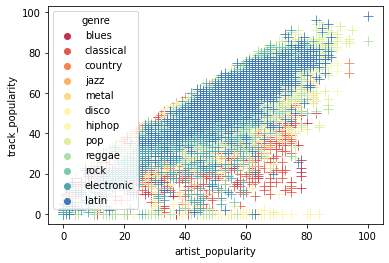

In [13]:
# Since we have seen a correlation between the popularity of the artist and the popularity of the track, 
# we have plot them and observe the distribution. 
# In the plot we can see that the section where the track popularity is high, and the artist popularity is low,
# is empty, so all the songs with high popularity also have high popularity in the artist.

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="artist_popularity", y="track_popularity", s=100, color=".1", marker="+", hue='genre', palette='Spectral')

<AxesSubplot:xlabel='loudness', ylabel='instrumentalness'>

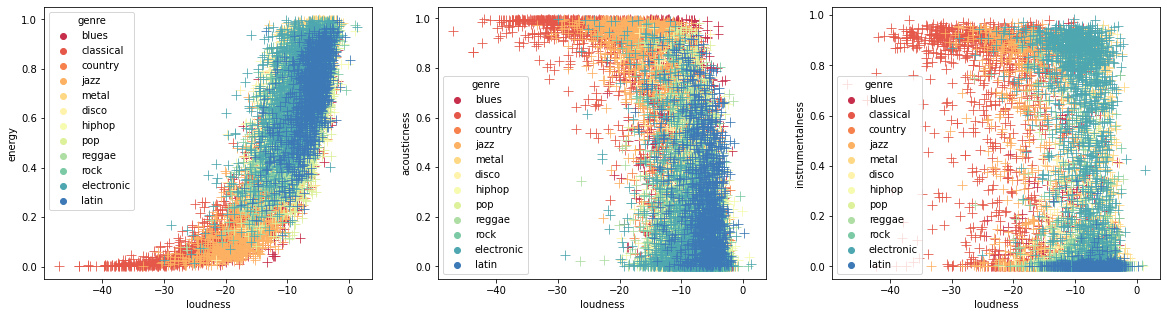

In [17]:
# The loudness has hight correlation between other variables, like the energy, the accousticness and the tempo.
# From this plots, we can already see how genres are distributed within the data.

fig, axs = plt.subplots(ncols=3, figsize=(20,5))
sns.scatterplot(data=df, x="loudness", y="energy", s=100, hue='genre', marker="+", ax=axs[0], palette='Spectral')
sns.scatterplot(data=df, x="loudness", y="acousticness", s=100, hue='genre', marker="+", ax=axs[1], palette='Spectral')
sns.scatterplot(data=df, x="loudness", y="instrumentalness", s=100, hue='genre', marker="+", ax=axs[2], palette='Spectral')

<AxesSubplot:xlabel='loudness', ylabel='instrumentalness'>

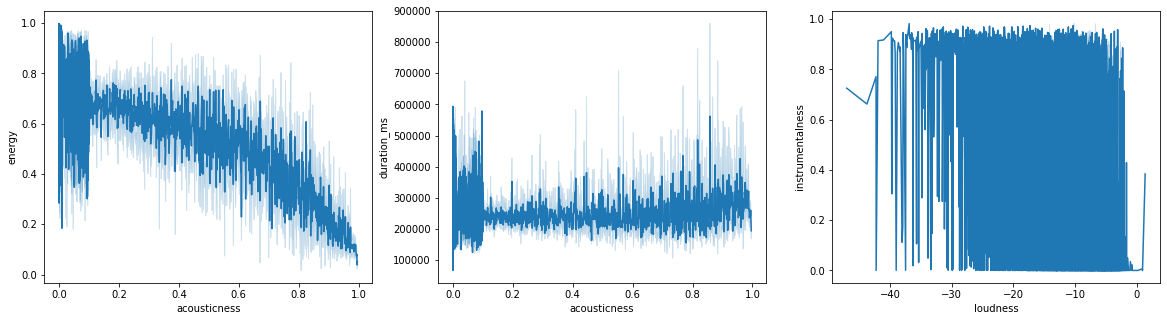

In [38]:
# In order to better observe the correlation, we have plotted lineplots, and from them we can see that:
# - the energy and the tempo have positive correlation with the loudness, the higher the loudness the higher are the 
# - the accousticness has a negative correlation with the loudness, the higher the loudness the lower the acousticness.

fig, axs = plt.subplots(ncols=3, figsize=(20,5))
sns.lineplot(data=df, x="acousticness", y="energy", ax=axs[0])
sns.lineplot(data=df, x="acousticness", y="duration_ms", ax=axs[1])
sns.lineplot(data=df, x="loudness", y="instrumentalness", ax=axs[2])

<AxesSubplot:xlabel='acousticness', ylabel='energy'>

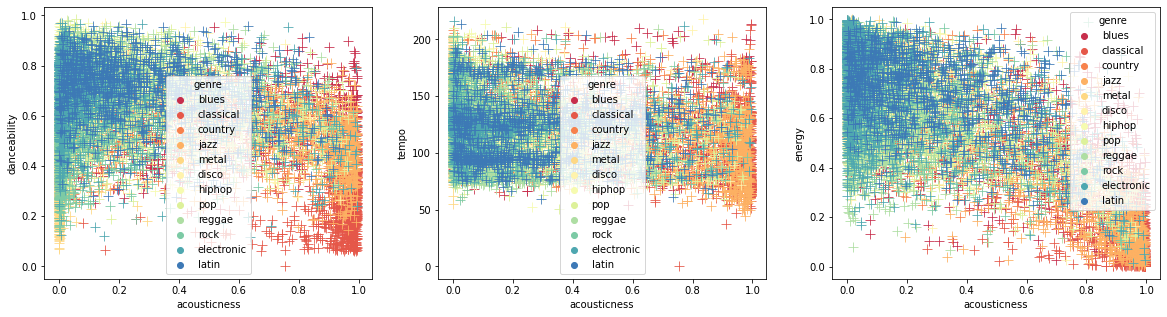

In [19]:
# Other variables which also had correlation were the energy, the acousticness and the tempo.
# We can see again that, when we plot the tempo, we can clearly identify the diferent genres. We also observe a 
# a positive correlation within the energy and the tempo, and a negative correlation in the other variables

fig, axs = plt.subplots(ncols=3, figsize=(20,5))
sns.scatterplot(data=df, x="acousticness", y="danceability", s=100, hue='genre', marker="+", ax=axs[0], palette='Spectral')
sns.scatterplot(data=df, x="acousticness", y="tempo", s=100,  hue='genre', marker="+", ax=axs[1], palette='Spectral')
sns.scatterplot(data=df, x="acousticness", y="energy", s=100,  hue='genre', marker="+", ax=axs[2], palette='Spectral')

<AxesSubplot:xlabel='acousticness', ylabel='energy'>

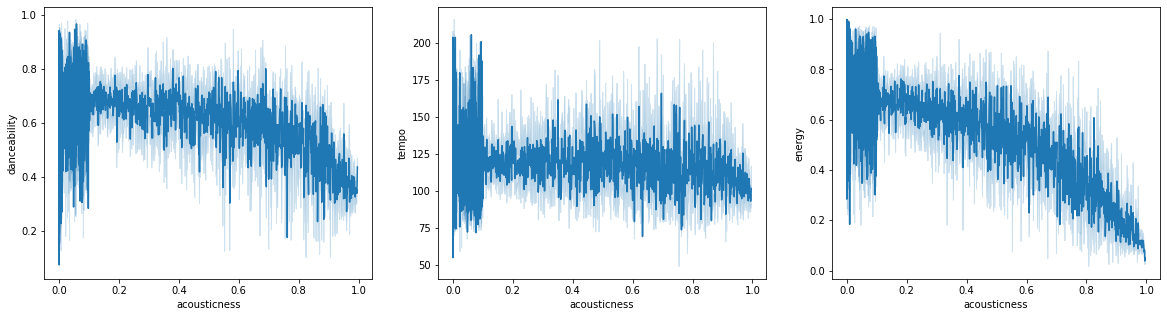

In [20]:
# In this graphs we can better see the correlation

fig, axs = plt.subplots(ncols=3, figsize=(20,5))
sns.lineplot(data=df, x="acousticness", y="danceability", ax=axs[0])
sns.lineplot(data=df, x="acousticness", y="tempo", ax=axs[1])
sns.lineplot(data=df, x="acousticness", y="energy", ax=axs[2])

<AxesSubplot:xlabel='valence', ylabel='loudness'>

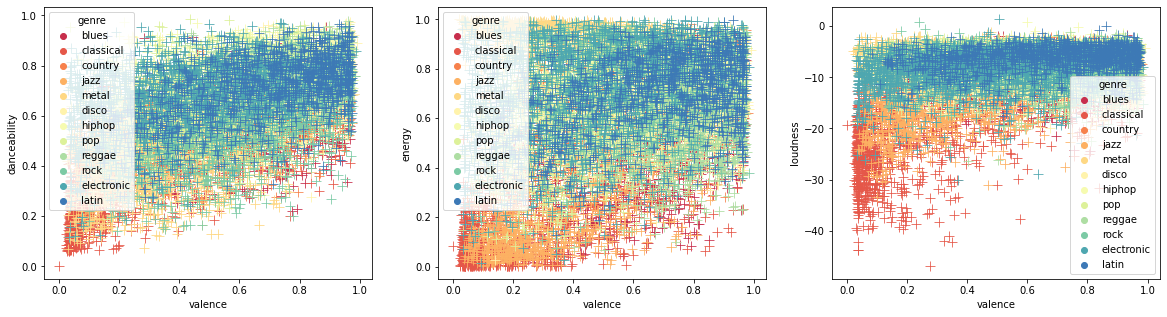

In [21]:
# Last, we have plotted other variables with correlation. Even if we can see a slight correlation, the biggest 
# difference we see is in the distribution of the genres, mostly the ambient

fig, axs = plt.subplots(ncols=3, figsize=(20,5))
sns.scatterplot(data=df, x="valence", y="danceability", s=100,  hue='genre', palette='Spectral', marker="+", ax=axs[0])
sns.scatterplot(data=df, x="valence", y="energy", s=100,  hue='genre', palette='Spectral', marker="+", ax=axs[1])
sns.scatterplot(data=df, x="valence", y="loudness", s=100,  hue='genre', palette='Spectral', marker="+", ax=axs[2])

<AxesSubplot:xlabel='valence', ylabel='loudness'>

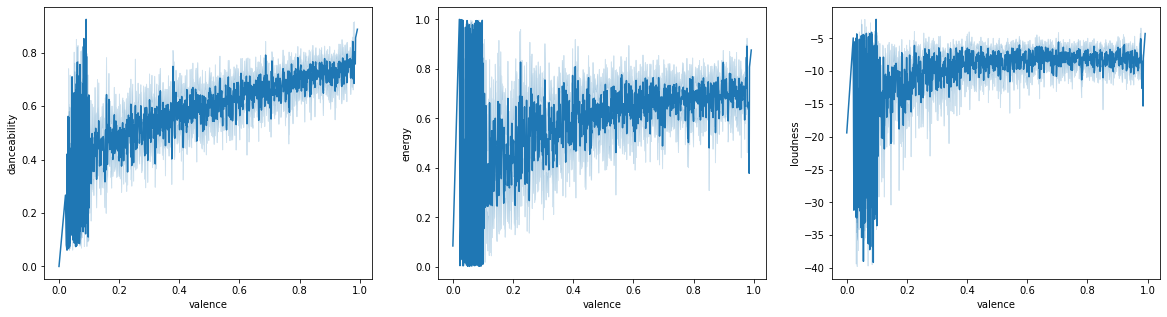

In [22]:
fig, axs = plt.subplots(ncols=3, figsize=(20,5))
sns.lineplot(data=df, x="valence", y="danceability", ax=axs[0])
sns.lineplot(data=df, x="valence", y="energy", ax=axs[1])
sns.lineplot(data=df, x="valence", y="loudness", ax=axs[2])

<AxesSubplot:xlabel='genre', ylabel='count'>

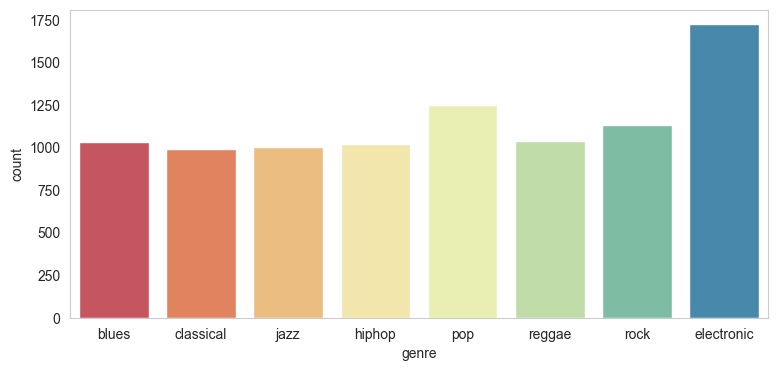

In [11]:
# Since our goal is to predict the genre, we will now observe all the variables divided by genre
# In this graph we can see how the data in the dataset is distributed among the genres

plt.figure(figsize=(9,4))
sns.countplot(x=df["genre"], color='.1', palette='Spectral')

<Figure size 1440x1440 with 0 Axes>

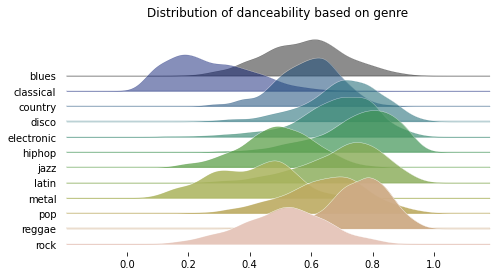

In [24]:
# We have chosen a joyplot for our following visualizations, as it clearly shows the variation
# in the distribution within the genres

plt.figure(figsize=(20,20))
joyplot(df, by = 'genre', column = 'danceability', colormap=cm.gist_earth, fade = True, figsize = (7,4), 
title = 'Distribution of danceability based on genre', linewidth=0.4, linecolor='white')
plt.show()

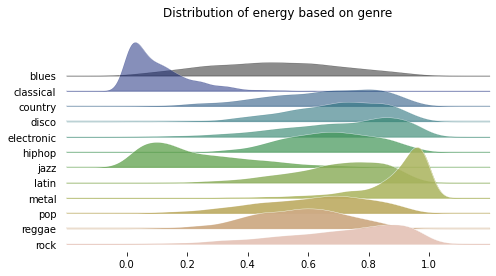

In [25]:
joyplot(df, by = 'genre', column = 'energy', colormap=cm.gist_earth, fade = True, figsize = (7,4), 
title = 'Distribution of energy based on genre', linewidth=0.4, linecolor='white')
plt.show()

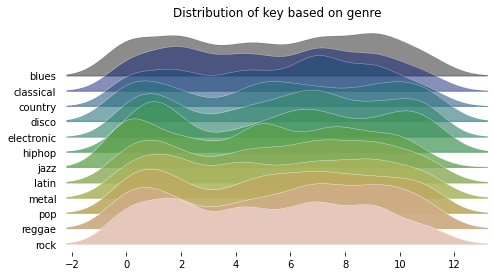

In [26]:
joyplot(df, by = 'genre', column = 'key', colormap=cm.gist_earth, fade = True, figsize = (7,4), 
title = 'Distribution of key based on genre', linewidth=0.4, linecolor='white')
plt.show()

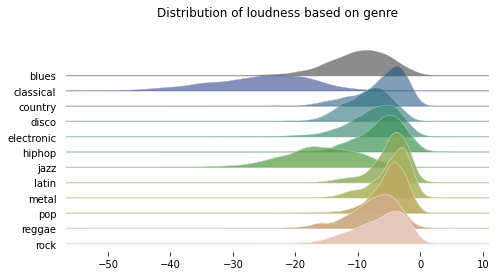

In [27]:
fig, axes = joyplot(df, by = 'genre', column = 'loudness', colormap=cm.gist_earth, fade = True, figsize = (7,4), 
title = 'Distribution of loudness based on genre', linewidth=0.4, linecolor='white')
for a in axes[:-1]:
    a.set_xlim([-50,7]) 
plt.show()

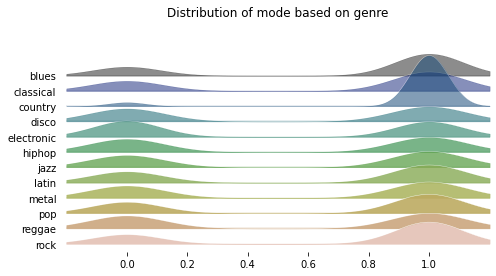

In [28]:
fig, axes = joyplot(df, by = 'genre', column = 'mode', colormap=cm.gist_earth, fade = True, figsize = (7,4), 
title = 'Distribution of mode based on genre', linewidth=0.4, linecolor='white')
for a in axes[:-1]:
    a.set_xlim([-0.2,1.2]) 
plt.show()

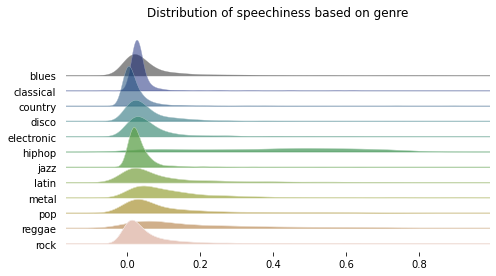

In [29]:
fig, axes = joyplot(df, by = 'genre', column = 'speechiness', colormap=cm.gist_earth, fade = True, figsize = (7,4), 
title = 'Distribution of speechiness based on genre', linewidth=0.4, linecolor='white')
for a in axes[:-1]:
    a.set_xlim([-0.05,0.5]) 
plt.show()

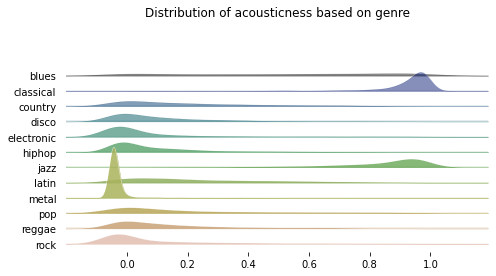

In [30]:
fig, axes = joyplot(df, by = 'genre', column = 'acousticness', colormap=cm.gist_earth, fade = True, figsize = (7,4), 
title = 'Distribution of acousticness based on genre', linewidth=0.4, linecolor='white')
for a in axes[:-1]:
    a.set_xlim([-0.15,1.2]) 
plt.show()

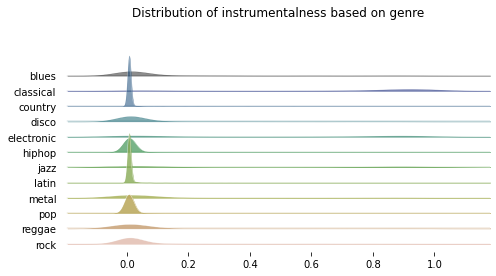

In [31]:
fig, axes = joyplot(df, by = 'genre', column = 'instrumentalness', colormap=cm.gist_earth, fade = True, figsize = (7,4), 
title = 'Distribution of instrumentalness based on genre', linewidth=0.4, linecolor='white')
for a in axes[:-1]:
    a.set_xlim([-0.2,1.15]) 
plt.show()

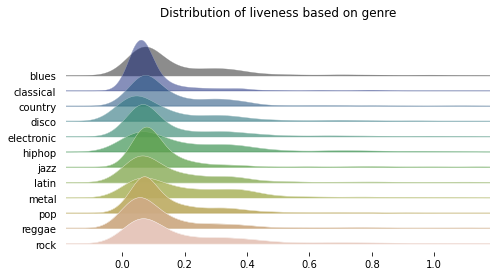

In [32]:
fig, axes = joyplot(df, by = 'genre', column = 'liveness', colormap=cm.gist_earth, fade = True, figsize = (7,4), 
title = 'Distribution of liveness based on genre', linewidth=0.4, linecolor='white')
for a in axes[:-1]:
    a.set_xlim([-0.1,1]) 
plt.show()

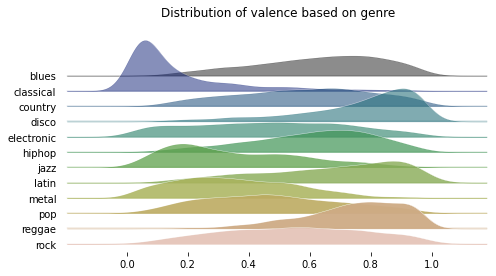

In [33]:
fix, axes = joyplot(df, by = 'genre', column = 'valence', colormap=cm.gist_earth, fade = True, figsize = (7,4), 
title = 'Distribution of valence based on genre', linewidth=0.4, linecolor='white')
for a in axes[:-1]:
    a.set_xlim([-0.2,1.2])  
plt.show()

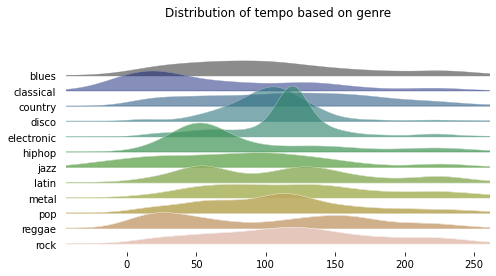

In [34]:
fig, axes = joyplot(df, by = 'genre', column = 'tempo', colormap=cm.gist_earth, fade = True, figsize = (7,4), 
title = 'Distribution of tempo based on genre', linewidth=0.4, linecolor='white')
for a in axes[:-1]:
    a.set_xlim([50,190])  
plt.show()

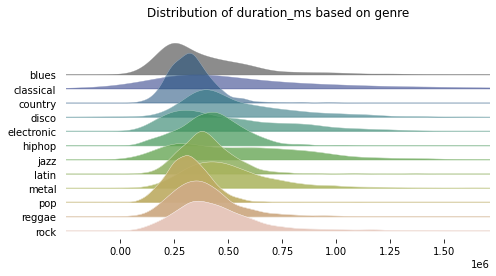

In [35]:
fig, axes = joyplot(df, by = 'genre', column = 'duration_ms', colormap=cm.gist_earth, fade = True, figsize = (7,4), 
title = 'Distribution of duration_ms based on genre', linewidth=0.4, linecolor='white')
for a in axes[:-1]:
    a.set_xlim([1000,700000])  
plt.show()

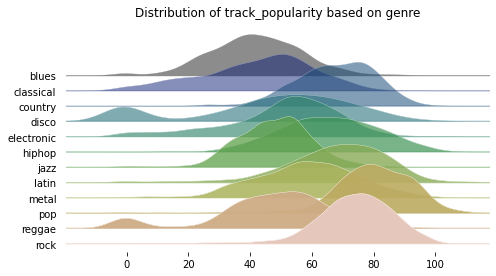

In [36]:
fig, axes = joyplot(df, by = 'genre', column = 'track_popularity', colormap=cm.gist_earth, fade = True, figsize = (7,4), 
title = 'Distribution of track_popularity based on genre', linewidth=0.4, linecolor='white')
for a in axes[:-1]:
    a.set_xlim([-15,100])  
plt.show()

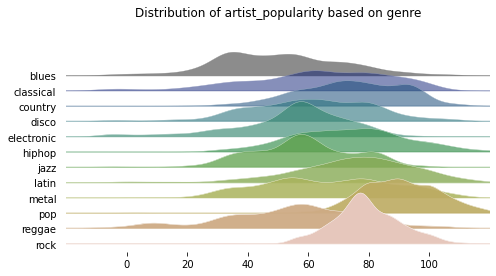

In [37]:
fig, axes = joyplot(df, by = 'genre', column = 'artist_popularity', colormap=cm.gist_earth, fade = True, figsize = (7,4), 
title = 'Distribution of artist_popularity based on genre', linewidth=0.4, linecolor='white')
for a in axes[:-1]:
    a.set_xlim([-10,90])  
plt.show()